Integrantes:
*   Gabriel Bianchi e Silva - RA: 140399
*   Miguel Silva Taciano - RA: 140756

Neste projeto será desenvolvida uma rede trófica composta de 6 espécies, com o objetivo de fazer essa rede sobreviver o máximo de tempo possível. O projeto se baseia em uma rede trófica inventada especialmente para essa simulação, que tem por base um mundo pós apocaliptico, assim, tem-se, além da espécie lobo e humano como carnívoros, também existem zumbis e canibais. Além desses 4, existem também o veado, como herbívoro, e a grama, que serve de base da "cadeia".

Para que a rede se mantenha serão utilizados parâmetros encontrados após diversos testes, mas que serão melhor explicados posteriormente.

Bibliotecas:

In [ ]:
import matplotlib.pyplot as plt

Parâmetros da simulação:

In [ ]:
k = 3000
p = [0] * 25
dT = 0.01

p[1] = 0.07
p[2] = 0.0001
p[3] = 0.07
p[4] = 0.0001
p[5] = 0.00007
p[6] = 0.00007
p[7] = 0.01
p[8] = 0.00005
p[9] = 0.00006
p[10] = 0.0004
p[11] = 0.2
p[12] = 0.0002
p[13] = 0.0003
p[14] = 0.0002
p[15] = 0.00001
p[16] = 0.0001
p[17] = 0.00001
p[18] = 0.00001
p[19] = 0.00001
p[20] = 0.00001
p[21] = 0.2
p[22] = 0.009
p[23] = 0.00001
p[24] = 0.000001

Os parâmetros foram encontrados pela análise parcial dos gráficos, onde foi introduzida uma espécie de cada vez, e utilizado muita tentativa e erro. 

Classes:

In [ ]:
class Grama:
    def __init__(self):
        self.G = 500
        self.Glista = [self.G]

    def deltaG(self, V, seca):
        if seca:
            novoK = 500
            dG = self.G * (p[1] - ((p[1] * self.G) / novoK) - (p[2] * V))
        else:
            dG = self.G * (p[1] - ((p[1] * self.G) / k) - (p[2] * V))

        self.G = self.G + dG * dT
        self.Glista.append(self.G)


class Veado:
    def __init__(self):
        self.V = 100
        self.Vlista = [self.V]

    def deltaV(self, G, L, H):
        dV = self.V * (-p[3] + (p[4] * G) - (p[5] * H) - (p[6] * L))

        self.V = self.V + dV * dT
        self.Vlista.append(self.V)


class Lobo:
    def __init__(self):
        self.L = 100
        self.Llista = [self.L]

    def deltaL(self, V, H, Z, mutacao):
        if mutacao:
            pZumbi = 0.0003
            dL = self.L * (-p[7] + (p[8] * V) + H * (p[9] - p[10]) - pZumbi * Z)
        else:
            dL = self.L * (-p[7] + (p[8] * V) + H * (p[9] - p[10]))

        self.L = self.L + dL * dT
        self.Llista.append(self.L)


class Humano:
    def __init__(self):
        self.H = 50
        self.Hlista = [self.H]

    def deltaH(self, V, L, Z, C):
        dH = self.H * (
            -p[11] + (p[12] * V) + L * (p[13] - p[16]) - (p[15] * Z) - p[14] * C
        )

        self.H = self.H + dH * dT
        self.Hlista.append(self.H)


class Zumbi:
    def __init__(self):
        self.Z = 300
        self.Zlista = [self.Z]

    def deltaZ(self, H, C, L, feroz, mutacao):
        if feroz:
            p[17] = 0.00005
            p[18] = 0.00005
            p[19] = 0.000015
            p[20] = 0.000015

        if mutacao:
            pLobo = 0.0002
            pZumbi = 0.0001
            dZ = self.Z * (
                -pZumbi + H * (p[17] - p[19]) + C * (p[18] - p[20]) + pLobo * L
            )
        else:
            dZ = self.Z * (H * (p[17] - p[19]) + C * (p[18] - p[20]))

        self.Z = self.Z + dZ * dT
        self.Zlista.append(self.Z)


class Canibal:
    def __init__(self):
        self.C = 80
        self.Clista = [self.C]

    def deltaC(self, H, Z):
        dC = self.C * (-p[21] + H * (p[22] - p[23]) - p[24] * Z)

        self.C = self.C + dC * dT
        self.Clista.append(self.C)

Principal:

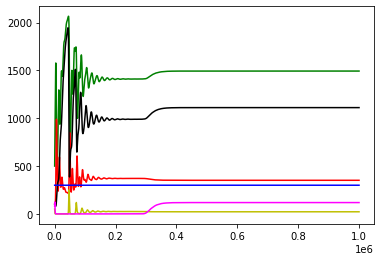

In [ ]:
grama = Grama()
veado = Veado()
lobo = Lobo()
humano = Humano()
zumbi = Zumbi()
canibal = Canibal()

tempo = 1000000

for i in range(tempo):
    V = veado.V
    G = grama.G
    L = lobo.L
    H = humano.H
    Z = zumbi.Z
    C = canibal.C
    
    grama.deltaG(V, False)
    veado.deltaV(G, L, H)
    lobo.deltaL(V, H, Z, False)
    humano.deltaH(H, L, Z, C)
    zumbi.deltaZ(H, C, L, False, False)
    canibal.deltaC(H, Z)


plt.plot(range(tempo + 1), grama.Glista, c="g")
plt.plot(range(tempo + 1), veado.Vlista, c="r")
plt.plot(range(tempo + 1), lobo.Llista, c="black")
plt.plot(range(tempo + 1), humano.Hlista, c="y")
plt.plot(range(tempo + 1), zumbi.Zlista, c="blue")
plt.plot(range(tempo + 1), canibal.Clista, c="magenta")
plt.show()

Para a análise das perturbações foi excluido o período transiente, considerando apenas após a estabilidade da rede trófica.

Perturbação 1 - Seca

Nessa perturbação houve uma época de seca, diminuindo a abundãncia de grama, e, para isso o valor de K foi diminuido.

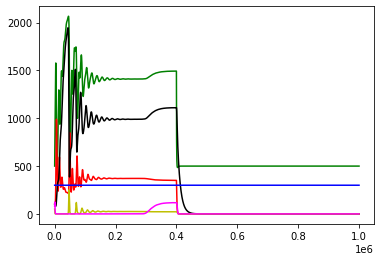

In [ ]:
grama2 = Grama()
veado2 = Veado()
lobo2 = Lobo()
humano2 = Humano()
zumbi2 = Zumbi()
canibal2 = Canibal()

for i in range(tempo):
    if(i > 400000): # Seca
        V = veado2.V
        G = grama2.G
        L = lobo2.L
        H = humano2.H
        Z = zumbi2.Z
        C = canibal2.C
        
        grama2.deltaG(V, True)
        veado2.deltaV(G, L, H)
        lobo2.deltaL(V, H, Z, False)
        humano2.deltaH(H, L, Z, C)
        zumbi2.deltaZ(H, C, L, False, False)
        canibal2.deltaC(H, Z)
    else:
        V = veado2.V
        G = grama2.G
        L = lobo2.L
        H = humano2.H
        Z = zumbi2.Z
        C = canibal2.C
        
        grama2.deltaG(V, False)
        veado2.deltaV(G, L, H)
        lobo2.deltaL(V, H, Z, False)
        humano2.deltaH(H, L, Z, C)
        zumbi2.deltaZ(H, C, L, False, False)
        canibal2.deltaC(H, Z)


plt.plot(range(tempo + 1), grama2.Glista, c="g")
plt.plot(range(tempo + 1), veado2.Vlista, c="r")
plt.plot(range(tempo + 1), lobo2.Llista, c="black")
plt.plot(range(tempo + 1), humano2.Hlista, c="y")
plt.plot(range(tempo + 1), zumbi2.Zlista, c="blue")
plt.plot(range(tempo + 1), canibal2.Clista, c="magenta")
plt.show()

Perturbação 2 - Zumbi Feroz

Nessa perturbação o Zumbi melhora a ingestão de "nutrientes" humanos, se beneficiando mais ao predar humanos(incluindo os canibais).

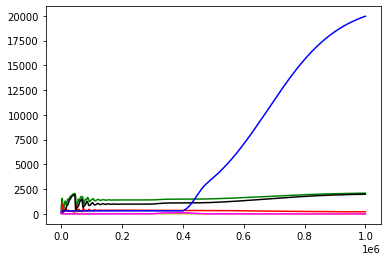

In [ ]:
grama3 = Grama()
veado3 = Veado()
lobo3 = Lobo()
humano3 = Humano()
zumbi3 = Zumbi()
canibal3 = Canibal()

for i in range(tempo):
    if(i > 400000): # Feroz
        V = veado3.V
        G = grama3.G
        L = lobo3.L
        H = humano3.H
        Z = zumbi3.Z
        C = canibal3.C
        
        grama3.deltaG(V, False)
        veado3.deltaV(G, L, H)
        lobo3.deltaL(V, H, Z, False)
        humano3.deltaH(H, L, Z, C)
        zumbi3.deltaZ(H, C, L, True, False)
        canibal3.deltaC(H, Z)
    else:
        V = veado3.V
        G = grama3.G
        L = lobo3.L
        H = humano3.H
        Z = zumbi3.Z
        C = canibal3.C
        
        grama3.deltaG(V, False)
        veado3.deltaV(G, L, H)
        lobo3.deltaL(V, H, Z, False)
        humano3.deltaH(H, L, Z, C)
        zumbi3.deltaZ(H, C, L, False, False)
        canibal3.deltaC(H, Z)


plt.plot(range(tempo + 1), grama3.Glista, c="g")
plt.plot(range(tempo + 1), veado3.Vlista, c="r")
plt.plot(range(tempo + 1), lobo3.Llista, c="black")
plt.plot(range(tempo + 1), humano3.Hlista, c="y")
plt.plot(range(tempo + 1), zumbi3.Zlista, c="blue")
plt.plot(range(tempo + 1), canibal3.Clista, c="magenta")
plt.show()

Perturbação 3 - Mutação do Zumbi

Nessa última perturbação houve uma mutação na espécie Zumbi, onde ela passou a conseguir predar os lobos.

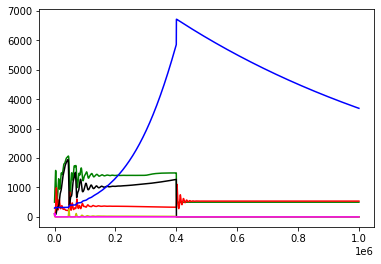

In [ ]:
grama4 = Grama()
veado4 = Veado()
lobo4 = Lobo()
humano4 = Humano()
zumbi4 = Zumbi()
canibal4 = Canibal()

for i in range(tempo):
    if(i > 400000): # Mutação
        V = veado4.V
        G = grama4.G
        L = lobo4.L
        H = humano4.H
        Z = zumbi4.Z
        C = canibal4.C
        
        grama4.deltaG(V, False)
        veado4.deltaV(G, L, H)
        lobo4.deltaL(V, H, Z, True)
        humano4.deltaH(H, L, Z, C)
        zumbi4.deltaZ(H, C, L, False, True)
        canibal4.deltaC(H, Z)
    else:
        V = veado4.V
        G = grama4.G
        L = lobo4.L
        H = humano4.H
        Z = zumbi4.Z
        C = canibal4.C
        
        grama4.deltaG(V, False)
        veado4.deltaV(G, L, H)
        lobo4.deltaL(V, H, Z, False)
        humano4.deltaH(H, L, Z, C)
        zumbi4.deltaZ(H, C, L, False, False)
        canibal4.deltaC(H, Z)


plt.plot(range(tempo + 1), grama2.Glista, c="g")
plt.plot(range(tempo + 1), veado4.Vlista, c="r")
plt.plot(range(tempo + 1), lobo4.Llista, c="black")
plt.plot(range(tempo + 1), humano4.Hlista, c="y")
plt.plot(range(tempo + 1), zumbi4.Zlista, c="blue")
plt.plot(range(tempo + 1), canibal4.Clista, c="magenta")
plt.show()